In [45]:
import datetime

%matplotlib inline
import matplotlib.pyplot as pd
from IPython.display import display, YouTubeVideo

import arcgis
from arcgis.gis import GIS
from arcgis.features.analyze_patterns import interpolate_points
from arcgis.geocoding import geocode
from arcgis.features.find_locations import trace_downstream
from arcgis.features.use_proximity import create_buffers

gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

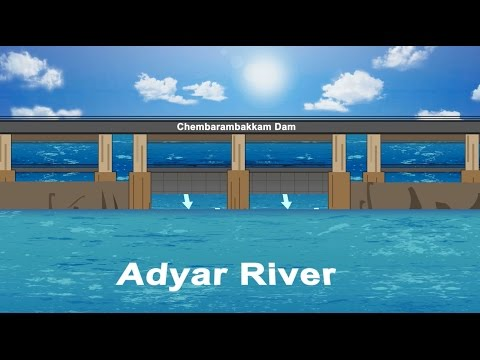

In [46]:
YouTubeVideo('x4dNIfx6HVs')

In [47]:
map = gis.map("Chennai")
map

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"Solid Waste Management- TN" type:Feature Layer Collection owner:esri_IN_content>
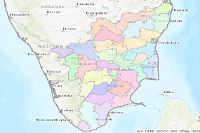

In [48]:
chennaipop = gis.content.search("Solid Waste Management- TN", 
                                item_type="feature service", 
                                outside_org=True)[0]
chennaipop

In [49]:
map.add_layer(chennaipop)

In [50]:
rainfall = gis.content.search("Chennai_precipitation", 
                              item_type="feature service", 
                              outside_org=True)[0]
rainfall

<Item title:"Chennai_precipitation" type:Feature Layer Collection owner:esri_notebook>

In [51]:
map2 = gis.map("Tamil Nadu, India")
map2

MapView(layout=Layout(height='400px', width='100%'))

In [52]:
map2.add_layer(rainfall, {"renderer":"ClassedSizeRenderer", 
                          "field_name":"RAINFALL" })

In [53]:
interpolated_rf = interpolate_points(rainfall, field='RAINFALL')

In [54]:
intmap = gis.map("Tamil Nadu")
intmap

MapView(layout=Layout(height='400px', width='100%'))

In [55]:
intmap.add_layer(interpolated_rf['result_layer'])

In [56]:
lakemap = gis.map("Chennai")
lakemap.height='450px'
lakemap

MapView(layout=Layout(height='400px', width='100%'))

In [57]:
lakemap.draw(geocode("Chembarambakkam, Tamil Nadu")[0], 
             {"title": "Chembarambakkam", "content": "Water reservoir"})
lakemap.draw(geocode("Puzhal Lake, Tamil Nadu")[0], 
             {"title": "Puzhal", "content": "Water reservoir"})
lakemap.draw(geocode("Kannampettai, Tamil Nadu")[0], 
             {"title": "Poondi Lake ", "content": "Water reservoir"})

In [58]:
search_results = gis.content.search("Chennai_lakes", 
                                   item_type="feature service",
                                   outside_org=True)
search_results

[<Item title:"chennai_lakes" type:Feature Layer Collection owner:lizgraham_gp2>,
 <Item title:"Chennai Lakes OverFlow Path" type:Feature Layer Collection owner:Balaganesh99>,
 <Item title:"Possible Flood Zones" type:Feature Layer Collection owner:Balaganesh99>,
 <Item title:"Chennai_lakes" type:Feature Layer Collection owner:esri_notebook>]

<Item title:"Possible Flood Zones" type:Feature Layer Collection owner:Balaganesh99>
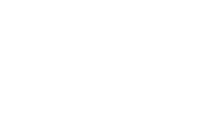

In [59]:
chennai_lakes = search_results[2]
chennai_lakes

In [63]:
from arcgis.features.find_locations import trace_downstream

In [65]:
downstream = trace_downstream(chennai_lakes)
downstream.query()

{"messageCode": "AO_100091", "message": "The input layer must be point geometry.", "params": {"paramName": "input layer"}}
{"messageCode": "AO_100122", "message": "TraceDownstream failed."}
Failed to execute (TraceDownstream).
Failed.


Exception: Job failed.

In [66]:
floodprone_buffer = create_buffers(downstream, [ 1 ], units='Miles')

NameError: name 'downstream' is not defined

In [67]:
lakemap.add_layer(floodprone_buffer)

NameError: name 'floodprone_buffer' is not defined

In [71]:
relief_centers = gis.content.search("Chennai Relief Centers")[0]

IndexError: list index out of range

In [70]:
reliefmap = gis.map("Chennai")
reliefmap

MapView(layout=Layout(height='400px', width='100%'))

In [72]:
reliefmap.add_layer(chennaipop)

In [73]:
reliefmap.add_layer(relief_centers)

NameError: name 'relief_centers' is not defined

In [74]:
relief_data = relief_centers.layers[0].query().sdf
relief_data.head()

NameError: name 'relief_centers' is not defined

In [75]:
relief_data['No_of_pers'].sum()

NameError: name 'relief_data' is not defined

In [76]:
relief_data['No_of_pers'].describe()

NameError: name 'relief_data' is not defined

In [77]:
relief_data['No_of_pers'].hist()

NameError: name 'relief_data' is not defined

In [78]:
relief_data.shape

NameError: name 'relief_data' is not defined

In [79]:
chennai_pop_featurelayer = chennaipop.layers[0]

In [80]:
res = arcgis.features.summarize_data.aggregate_points(
    relief_centers, 
    chennai_pop_featurelayer, 
    False, 
    ["No_of_pers Sum"])

NameError: name 'relief_centers' is not defined

In [81]:
aggr_lyr = res['aggregated_layer']

NameError: name 'res' is not defined

In [82]:
reliefmap.add_layer(aggr_lyr, { "renderer": "ClassedSizeRenderer", 
                               "field_name":"SUM_No_of_pers"})

NameError: name 'aggr_lyr' is not defined

In [83]:
df = aggr_lyr.query().sdf
df.head()

NameError: name 'aggr_lyr' is not defined

In [84]:
df = aggr_lyr.query().sdf

df2 = df[['district_name', 'SUM_No_of_pers']]
df2.set_index('district_name', inplace=True)
df2

NameError: name 'aggr_lyr' is not defined

In [85]:
df2.plot(kind='bar')

NameError: name 'df2' is not defined

In [86]:
routemap = gis.map("Chennai")
routemap

MapView(layout=Layout(height='400px', width='100%'))

In [87]:
nehru_stadium = geocode('Jawaharlal Nehru Stadium, Chennai')[0]
routemap.draw(nehru_stadium, {"title": "Nehru Stadium", 
                              "content": "Chennai Flood Relief Center"})

In [88]:
start_time = datetime.datetime(2015, 12, 13, 9, 0)

In [89]:
routes = arcgis.features.use_proximity.plan_routes(
    relief_centers, 
    15, 
    15, 
    start_time, 
    nehru_stadium, 
    stop_service_time=30)
routemap.add_layer(routes['routes_layer'])

NameError: name 'relief_centers' is not defined

In [90]:
routemap.add_layer(routes['assigned_stops_layer'])

NameError: name 'routes' is not defined